# 20200514 스터디 CNN 실습 Code

### 내가 할일 
1. activation function 변경하기 RELU -> tanh 
2. 정규화 과정중 0~1이 아닌 0~255/70 으로 실행

프로젝트 2번 실행

In [0]:
import tensorflow as tf

In [2]:
# tensorflow 버전은 2.2
print(tf.__version__)

2.2.0


In [3]:
# 우리 예제는 1.x 버전때의 코드라 placeholder를 사용할 수 없음
# 사용하기 위해 아래의 코드를 추가
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

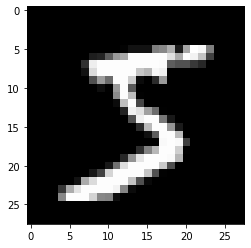

In [7]:
# 위의 예제를 시각적으로 확인하기 위해 matplotlib 를 import
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.imshow(x_train[0], cmap='gray')

In [0]:
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

In [9]:
print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

train data has 50000 samples
every train data is 28 * 28 image


In [10]:
print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

validation data has 10000 samples
every train data is 28 * 28 image


### 데이터 구조 변경하기

28 * 28 단색 이미지 이므롤 데이터의 형태를 __(28,28,1)__ 로 맞춰 줍니다. 

In [11]:
import numpy as np

x_train = x_train[..., tf.newaxis]
# tensorflow 공홈에선 위의 방법을 추천

x_val = np.reshape(x_val, (10000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

print(x_train.shape)
print(x_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


학습을 하기위해선 기존의 타입이 아닌 float 형태로 타입 변환을 해주어야 한다.

또한 정규화는 학습 시간을 단축하고, 더 나은 성능을 구하도록 도와준다.

tensorflow2.0 부턴 imgdatagenerator 에서 모두 처리가 가능하다.

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

# gray_scale = 255
# 70으로 변경
gray_scale = 70
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

In [0]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
# 문제의 에러단, 시작부분에 이로인해 어떠한 코드 2줄을 추가하였다.

x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

__padding__ : 경계 처리 방법을 정의합니다.  


- valid : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
- same : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.

In [0]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [0]:
W_conv1 = weight_variable([5, 5, 1, 16])
b_conv1 = bias_variable([16])

### 활성화 함수로 난 tanh를 사용

In [0]:
# h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
h_conv1 = tf.nn.tanh(conv2d(x, W_conv1) + b_conv1)

In [0]:
h_pool1 = max_pool_2x2(h_conv1)

In [0]:
W_conv2 = weight_variable([5, 5, 16, 32])
b_conv2 = bias_variable([32])

h_conv2 = tf.nn.tanh(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [0]:
W_fc1 = weight_variable([7 * 7 * 32, 128])
b_fc1 = bias_variable([128])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*32])
h_fc1 = tf.nn.tanh(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [0]:
W_fc2 = weight_variable([128, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

In [0]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_, logits=y_conv))

In [0]:
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [0]:
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### 학습 및 테스트

In [31]:
import time

# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 3
batch_size = 50
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    tf.set_random_seed(777)
    # Run the initializer
    sess.run(init)
    start_time =time.time()
   
    for epoch in range(epoch_cnt):
        
        
        print("\n {}번째 학습".format(epoch+1))
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            if i%100 == 0:
                train_acc = accuracy.eval(
                        feed_dict={x:x_train[start: end], 
                                    y_: y_train[start: end]})
                print("step "+str(i)+ ": train acc: "+str(train_acc))
            labels = train_step.run(
                feed_dict={
                    x:x_train[start: end], y_: y_train[start: end]})
            start += batch_size; end += batch_size    
        
        # Validate model
        val_accuracy = accuracy.eval(feed_dict={x:x_val, y_: y_val})
        print("validation accuracy: "+str(val_accuracy))

    print(round(time.time()-start_time))
    test_accuracy = accuracy.eval(feed_dict={x:x_test, y_: y_test}) 
    print("test accuracy: "+str(test_accuracy))





 1번째 학습
step 0: train acc: 0.12
step 100: train acc: 0.92
step 200: train acc: 0.9
step 300: train acc: 0.98
step 400: train acc: 0.94
step 500: train acc: 0.98
step 600: train acc: 0.96
step 700: train acc: 0.98
step 800: train acc: 0.94
step 900: train acc: 1.0
validation accuracy: 0.9789

 2번째 학습
step 0: train acc: 0.96
step 100: train acc: 0.98
step 200: train acc: 0.96
step 300: train acc: 1.0
step 400: train acc: 0.96
step 500: train acc: 1.0
step 600: train acc: 0.98
step 700: train acc: 1.0
step 800: train acc: 0.96
step 900: train acc: 1.0
validation accuracy: 0.9866

 3번째 학습
step 0: train acc: 0.98
step 100: train acc: 0.98
step 200: train acc: 1.0
step 300: train acc: 1.0
step 400: train acc: 1.0
step 500: train acc: 1.0
step 600: train acc: 0.98
step 700: train acc: 1.0
step 800: train acc: 1.0
step 900: train acc: 0.98
validation accuracy: 0.9878
13
test accuracy: 0.9857


원본 예제의 학습시간은 8초 정도였다면 위의 모델은 13초가 걸린다. 아무래도 정규화 과정에서 이러한 문제가 발생되는듯 하다. 하지만 그만큼 정확도가 높았다.